<h1 align="center">GPU and CPU performance test with small image classification</h1>


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

**checking all the available physical devices on system**

In [2]:
tf.config.experimental.list_physical_devices()  # GPU is not present on system

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.__version__    # tensorflow version

'2.3.0'

In [4]:
tf.test.is_built_with_cuda()    # is 'cuda' available

False

**loading the dataset from keras And splitting**

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0][0][:5]

array([[59, 62, 63],
       [43, 46, 45],
       [50, 48, 43],
       [68, 54, 42],
       [98, 73, 52]], dtype=uint8)

In [8]:
y_train.shape

(50000, 1)

**showing image**

In [9]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

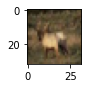

In [10]:
plot_sample(3)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
classes[y_train[3][0]]

'deer'

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**converting the Y values to categorical values**

In [14]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Using keras from tensorflow with 4 layes**

In [17]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 101s 64ms/step - loss: 1.8645 - accuracy: 0.3314


In [18]:
np.argmax(model.predict(X_test_scaled)[0])

5

In [19]:
classes[y_test[0][0]]

'cat'

**To use timeit magic on GPU and CPU, model is placed inside 'get_model' method**

In [20]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

**Time taken by CPU will be shown in the output**

In [21]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 107s 69ms/step - loss: 1.8533 - accuracy: 0.3380
1min 49s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
# gpu is not working on my system,but person with GPU would be able to run this code 
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [ ]:
# we can change the epoch values and check for different epochs